In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage.segmentation import find_boundaries

In [3]:
file = '/home/adrian/workspace/ilastik-datasets/Vladyslav/GT/GT_0_test0.h5'
element_size_um = np.array([1., 0.17297205, 0.17297205])

with h5py.File(file, 'r+') as f:
    label = f['cc'][...]

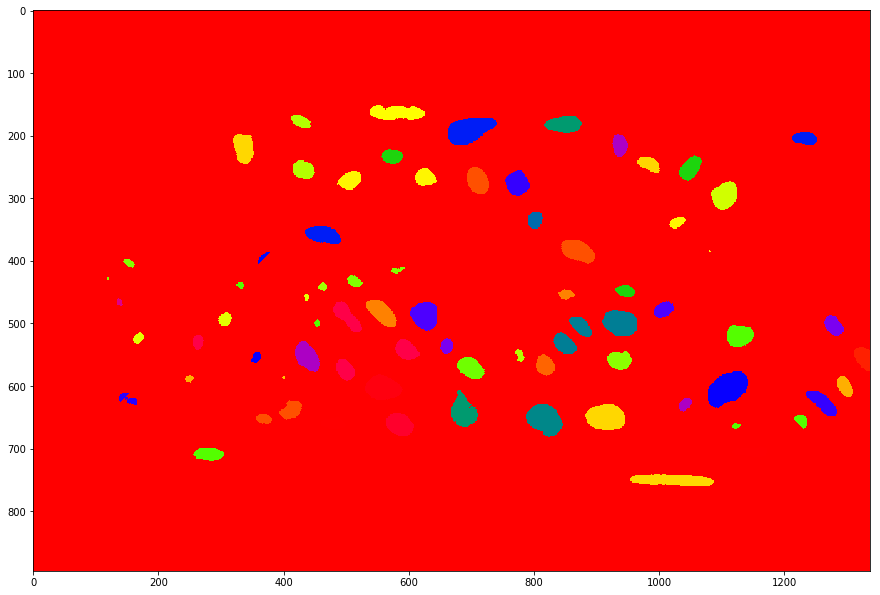

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(label[90], cmap='prism')

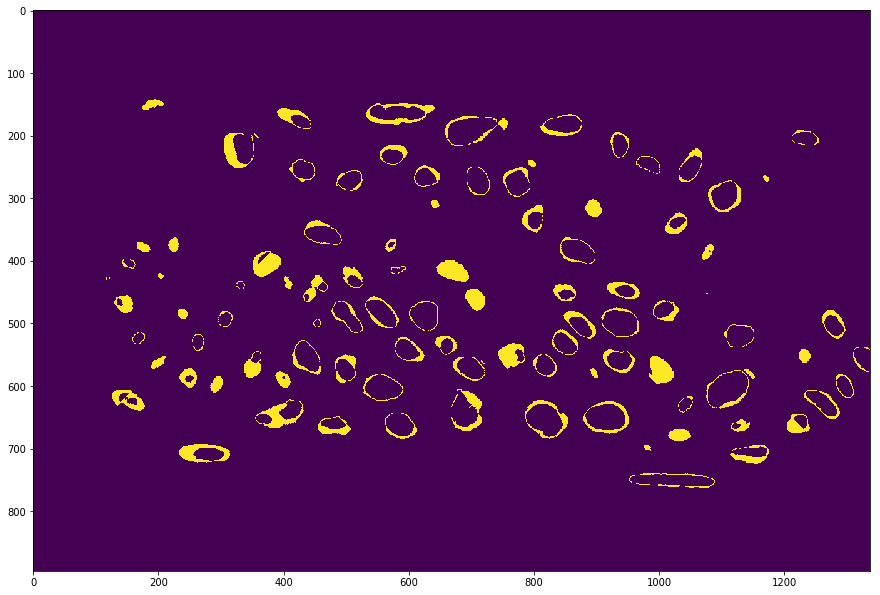

In [10]:
boundary = find_boundaries(label, connectivity=2, mode='outer')
plt.figure(figsize=(15,15))
plt.imshow(boundary[90])

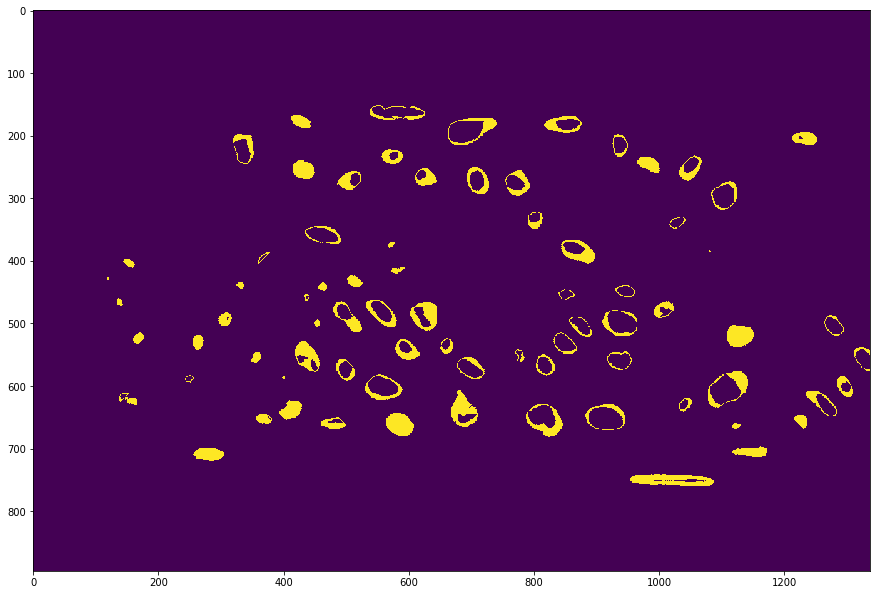

In [12]:
boundary = find_boundaries(label, connectivity=2, mode='inner')
plt.figure(figsize=(15,15))
plt.imshow(boundary[90])

In [20]:
from skimage.filters import gaussian

def blur_boundary(boundary, sigma):
    boundary = gaussian(boundary, sigma=sigma)
    boundary[boundary >= 0.5] = 1
    boundary[boundary < 0.5] = 0
    return boundary

class BlobsWithBoundary:
    def __init__(self, mode=None, append_label=False, blur=False, sigma=1):
        if mode is None:
            mode = ['thick', 'inner', 'outer']
        self.mode = mode
        self.append_label = append_label
        self.blur = blur
        self.sigma = sigma

    def __call__(self, m):
        assert m.ndim == 3

        # get the segmentation mask
        results = [(m > 0).astype('uint8')]

        for bm in self.mode:
            boundary = find_boundaries(m, connectivity=2, mode=bm)
            if self.blur:
                boundary = blur_boundary(boundary, self.sigma)
            results.append(boundary)

        if self.append_label:
            results.append(m)

        return np.stack(results, axis=0)

TypeError: Invalid dimensions for image data

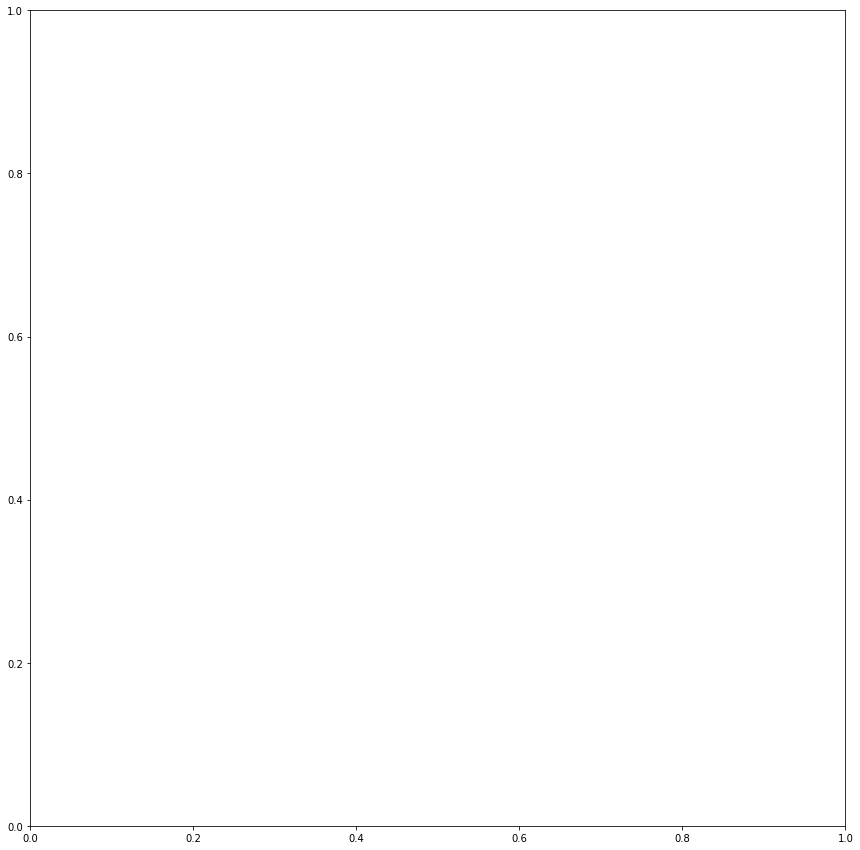

In [21]:
t = BlobsWithBoundary(blur=True, sigma=1.2)
target = t(label)
plt.figure(figsize=(15,15))
plt.imshow(target[0][90])